In [1]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

df = pd.read_csv('/kaggle/input/parkinsons-dataset/features_dataset.csv')

# Map label to binary
df['label'] = df['label'].replace({"Healthy": 0, "Parkinsons": 1, "Parkinson's": 1})

# Only numeric features for XGBoost
X = df.select_dtypes(include=['number']).drop(columns=['label'])
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)
model.fit(X_train, y_train)


preds = model.predict(X_test)
print(classification_report(y_test, preds))

# Add this line to print overall accuracy
accuracy = accuracy_score(y_test, preds)
print("Test Accuracy: {:.2f}".format(accuracy))

/tmp/ipykernel_37/1039037734.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['label'] = df['label'].replace({"Healthy": 0, "Parkinsons": 1, "Parkinson's": 1})


              precision    recall  f1-score   support

           0       0.92      0.89      0.91       179
           1       0.88      0.92      0.90       164

    accuracy                           0.90       343
   macro avg       0.90      0.90      0.90       343
weighted avg       0.90      0.90      0.90       343

Test Accuracy: 0.90


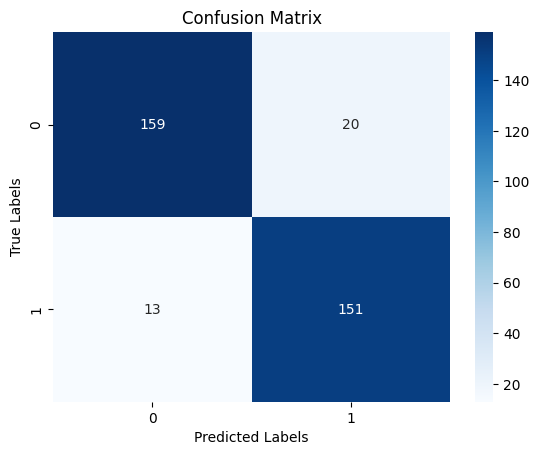

In [2]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


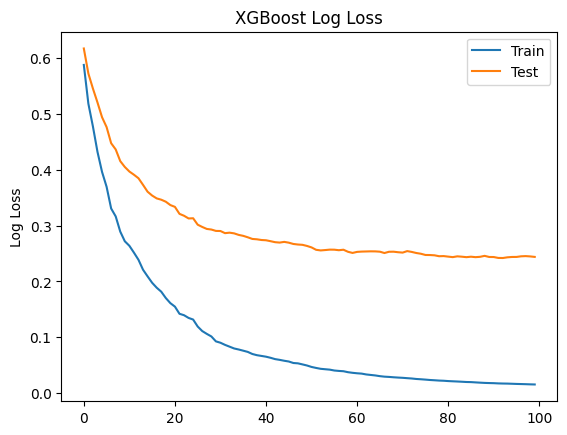

In [3]:
eval_set = [(X_train, y_train), (X_test, y_test)]
model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)
model.fit(X_train, y_train, eval_set=eval_set, verbose=False)

# Get evaluation results
results = model.evals_result()

# Plot logloss
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)
plt.figure()
plt.plot(x_axis, results['validation_0']['logloss'], label='Train')
plt.plot(x_axis, results['validation_1']['logloss'], label='Test')
plt.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()


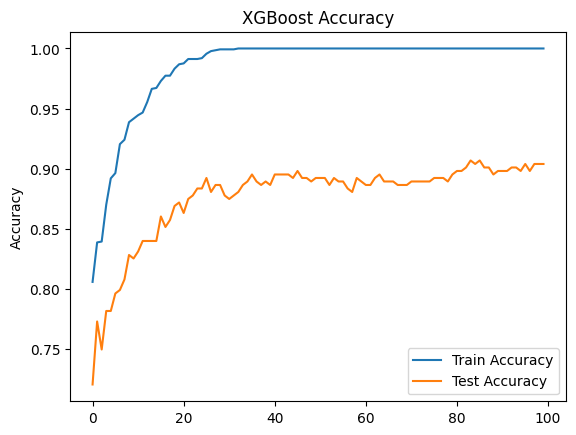

In [4]:
model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='error', use_label_encoder=False)
model.fit(X_train, y_train, eval_set=eval_set, verbose=False)
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
plt.figure()
plt.plot(x_axis, [1-x for x in results['validation_0']['error']], label='Train Accuracy')
plt.plot(x_axis, [1-x for x in results['validation_1']['error']], label='Test Accuracy')
plt.legend()
plt.ylabel('Accuracy')
plt.title('XGBoost Accuracy')
plt.show()


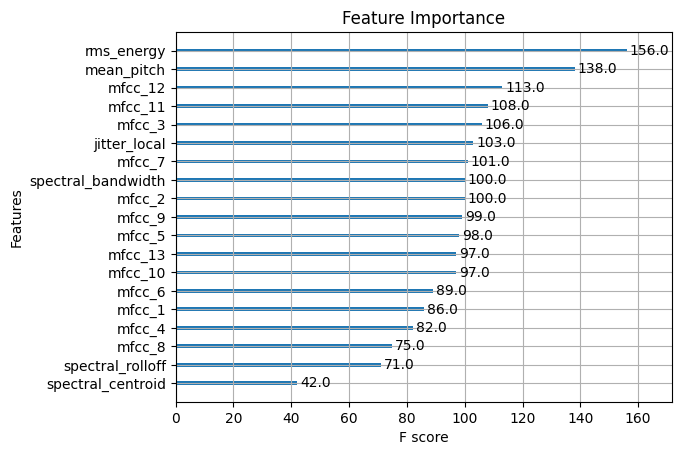

In [5]:
xgb.plot_importance(model)
plt.title('Feature Importance')
plt.show()


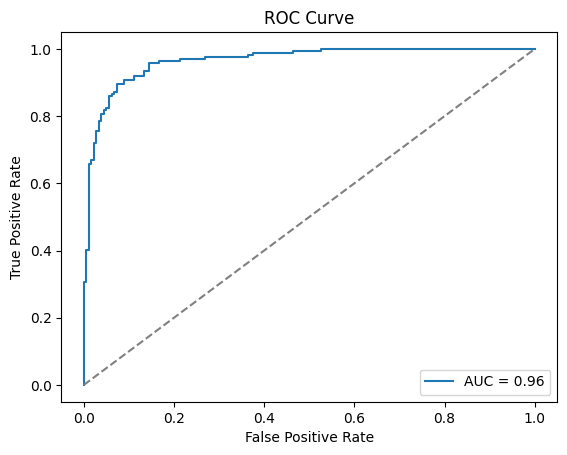

In [6]:
from sklearn.metrics import roc_curve, auc

y_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='AUC = %.2f' % roc_auc)
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
